In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [99]:
# prepare the Big 430 (subset of 930 cells) for cyclone input
# 930 Dataset, RUN This 1:1
import h5py
import pandas as pd
import csv

SC_df = pd.DataFrame()

column_names = []
with open('Dataset930.csv') as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)
    counter = 0
    full_row = []
    gene_name = ""
    for row in reader:
        if (counter < 930):
            phase = ""
            if (row[1] == "g0/g1"):
                phase = "G1"
            elif (row[1] == "s"):
                phase = "S"
            elif (row[1] == "g2/m"):
                phase = "G2M"
            name = "cell_" + str(counter) + "_" + phase
            column_names.append(name)
        if (counter%930 == 0 and counter > 0):
            SC_df[gene_name] = full_row
            #print(full_row)
            full_row = []
            
        full_row.append(float(row[9]))
        gene_name = row[6]
        
        counter += 1
SC_df = SC_df.T
SC_df.columns = column_names
SC_df_test = SC_df.iloc[:,500:]

######## now get transform to 430 set
new_ftst = h5py.File('Big_430.h5f', 'w')


new_ftst.create_dataset('counts', data=SC_df_test.values.T)


symListForCyclone = list()
for name in SC_df_test.index:
    symListForCyclone.append(name.encode('utf-8'))
    
#gene_names_all = ftst['gene_names_all'][:]
#new_ftst.create_dataset('ensIds', data=gene_names_all)
new_ftst.create_dataset('sym_names', data=symListForCyclone)
       
labels_tst =  list()
for name in SC_df_test.columns:
    if ("G1" in name):
        labels_tst.append("G1".encode('utf-8'))
    elif ("G2M" in name):
        labels_tst.append("G2M".encode('utf-8'))
    else:
        labels_tst.append("S".encode('utf-8'))
#labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
new_ftst.create_dataset('labels', data=labels_tst)

new_ftst.close() 

#print(SC_df_test.shape)

SC_df = SC_df_test 

In [21]:
# Prepare 430 Dataset, for Seurat
# RUN This 1:1

import csv

SC_df = pd.DataFrame()

column_names = []
with open('Dataset930.csv') as f:
    reader = csv.reader(f, delimiter="\t")
    next(reader)
    counter = 0
    full_row = []
    gene_name = ""
    for row in reader:
        if (counter < 930):
            phase = ""
            if (row[1] == "g0/g1"):
                phase = "G1"
            elif (row[1] == "s"):
                phase = "S"
            elif (row[1] == "g2/m"):
                phase = "G2"
            name = "cell_" + str(counter) + "_" + phase
            column_names.append(name)
        if (counter%930 == 0 and counter > 0):
            SC_df[gene_name] = full_row
            #print(full_row)
            full_row = []
            
        full_row.append(float(row[9]))
        gene_name = row[6]
        
        counter += 1
SC_df = SC_df.T
SC_df.columns = column_names

seurat_genes = [line.rstrip('\n') for line in open('regev_lab_cell_cycle_genes.txt')]
seurat_intersect_genes = list()
for gene in seurat_genes:
    if gene in SC_df.index:
        seurat_intersect_genes.append(gene)
        
SC_seurat_df = SC_df.loc[seurat_intersect_genes]
SC_no_seurat_df = SC_df.drop(SC_seurat_df.index)
#print(stahlberg_MCF7_no_seurat_df)

dfs = dict()
dfs["orig"] = SC_df
for i in range(0, 29):
    name = "df_" + str(i)
    dfs[name] = SC_no_seurat_df.rename(lambda x: x + "_" + str(i))
expanded_SC_df = pd.concat(dfs.values())

expanded_SC_df_test = expanded_SC_df.iloc[:,500:]
#print(expanded_stahlberg_MCF7_df)
expanded_SC_df_test.to_csv("expanded_Big_430_as_sc.csv", sep='\t', index=True)

SC_df = SC_df.iloc[:,500:]

In [150]:
# Stahlberg 1:1 RUN this cell for Stahlberg
import pandas as pd

# read in the single-cell data, and identify the set of genes that also have micro-array/tpm expression (1114)
# for each cell, get percentage of reads for each gene
# for the micro-array set, get percentage of "expression" for each gene
# for each gene, get the best match of percentages for each of the time-courses, and take an average angle
# then take the average angle of all the genes - that gives the phase
### process SC single cell data for Seurat input
SC_df = pd.read_csv("Stahlberg_MCF7_group_1_to_6.csv", sep=',')
def phase_to_string(phase_number):
    if (phase_number in (1, 4, 9)):
        return "G1"
    if (phase_number in (2, 5, 10)):
        return "S"
    if (phase_number in (3, 6, 11)):
        return "G2M"
SC_df = SC_df.rename(lambda x: x + "_" + phase_to_string(int(SC_df.loc[x, "#Group"])))
SC_df = SC_df.iloc[:,:-3]
SC_df = SC_df.replace(-1,0.0).T
print(len(SC_df.columns))
print(len(SC_df.index))

90
81


In [55]:
# converting Stahlberg to cyclone
new_ftst = h5py.File('stahlberg_MCF7.h5f', 'w')


new_ftst.create_dataset('counts', data=SC_df.values.T)


symListForCyclone = list()
for name in SC_df.index:
    symListForCyclone.append(name.encode('utf-8'))
    
#gene_names_all = ftst['gene_names_all'][:]
#new_ftst.create_dataset('ensIds', data=gene_names_all)
new_ftst.create_dataset('sym_names', data=symListForCyclone)
       
labels_tst =  list()
for name in SC_df.columns:
    if ("G1" in name):
        labels_tst.append("G1".encode('utf-8'))
    elif ("G2M" in name):
        labels_tst.append("G2M".encode('utf-8'))
    else:
        labels_tst.append("S".encode('utf-8'))
#labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
new_ftst.create_dataset('labels', data=labels_tst)

new_ftst.close() 

In [ ]:
### process Stahlberg single cell data for Seurat input
stahlberg_MCF7_df = pd.read_csv("Stahlberg_MCF7_group_1_to_6.csv", sep=',')
def phase_to_string(phase_number):
    if (phase_number in (1, 4, 9)):
        return "G1"
    if (phase_number in (2, 5, 10)):
        return "S"
    if (phase_number in (3, 6, 11)):
        return "G2"
stahlberg_MCF7_df = stahlberg_MCF7_df.rename(lambda x: x + "_" + phase_to_string(int(stahlberg_MCF7_df.loc[x, "#Group"])))
stahlberg_MCF7_df = stahlberg_MCF7_df.iloc[:,:-3]
stahlberg_MCF7_df = stahlberg_MCF7_df.replace(-1,0.0).T
#print(stahlberg_MCF7_df)

seurat_genes = [line.rstrip('\n') for line in open('regev_lab_cell_cycle_genes.txt')]
seurat_intersect_genes = list()
for gene in seurat_genes:
    if gene in stahlberg_MCF7_df.index:
        seurat_intersect_genes.append(gene)
        
stahlberg_MCF7_seurat_df = stahlberg_MCF7_df.loc[seurat_intersect_genes]
stahlberg_MCF7_no_seurat_df = stahlberg_MCF7_df.drop(stahlberg_MCF7_seurat_df.index)
#print(stahlberg_MCF7_no_seurat_df)

dfs = dict()
dfs["orig"] = stahlberg_MCF7_df
for i in range(0, 29):
    name = "df_" + str(i)
    dfs[name] = stahlberg_MCF7_no_seurat_df.rename(lambda x: x + "_" + str(i))
expanded_stahlberg_MCF7_df = pd.concat(dfs.values())
#print(expanded_stahlberg_MCF7_df)
expanded_stahlberg_MCF7_df.to_csv("expanded_stahlberg_MCF7_as_sc.csv", sep='\t', index=True)

In [178]:
# for mESCquartz 1:1
import h5py
ftst = h5py.File("normCounts_mESCquartz.h5f",'r')
#print([key for key in ftst.keys()])
#print(ftst['cell_names'][:])
import mygene
mg = mygene.MyGeneInfo()

gene_names_all = ftst['gene_names_all'][:]
gene_names_all = [x.decode('utf-8') for x in gene_names_all]
geneSyms = mg.querymany(gene_names_all, scopes='ensembl.gene', fields='symbol', species='mouse')
newGeneList = list()
for i in range(0, len(gene_names_all)):
    if 'symbol' in geneSyms[i]:
        newGeneList.append(geneSyms[i]['symbol'].upper())
    else:
        newGeneList.append(gene_names_all[i])

YT = ftst['LogNcountsQuartz'][:]
#print(YT.shape)
labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
#print(labels_tst)
#print(ftst["cell_names"][:])
# G1, S, G2M

# MouseEST 35 3:3 RUN this cell for mouseEST
string_labels = list()
cell_names = ftst["cell_names"][:]
cell_names = gene_names_all = [x.decode('utf-8') for x in cell_names]
for label in cell_names:
    if ("_G1" in label):
        string_labels.append("_G1")
    if ("_S" in label):
        string_labels.append("_S")
    if ("_G2" in label):
        string_labels.append("_G2")
SC_df = pd.DataFrame(YT.T)
SC_df.columns = cell_names
SC_df.index = newGeneList

#print(SC_df.shape)
SC_df = SC_df[~SC_df.index.duplicated(keep='first')]
#print(SC_df.shape)
#print(SC_df["ES_G1_1"]["BFAR"])

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [ ]:
# converting mESC for Seurat input
SC_df.to_csv("mESCquartz_as_sc.csv", sep='\t', index=True)

In [ ]:
# don't need to convert mESCquartz to cyclone - their native dataset

In [ ]:
# micro=array 1:1  converting micro-array to cyclone
import pandas as pd
SC_df = pd.read_csv("Skin-SunExposed(Lowerleg)_whitfield_micro_array_as_sc.csv", sep='\t', index_col = 0)

print(SC_df.values.shape)
new_ftst = h5py.File('microarray_leg.h5f', 'w')


new_ftst.create_dataset('counts', data=SC_df.values.T)


symListForCyclone = list()
print(SC_df.index)
for name in SC_df.index:
    symListForCyclone.append(name.encode('utf-8'))
    
#gene_names_all = ftst['gene_names_all'][:]
#new_ftst.create_dataset('ensIds', data=gene_names_all)
new_ftst.create_dataset('sym_names', data=symListForCyclone)
       
labels_tst =  list()
for name in time_course_all_phases_list:
    if ("G1" in name):
        labels_tst.append("G1".encode('utf-8'))
    elif ("G2M" in name):
        labels_tst.append("G2M".encode('utf-8'))
    else:
        labels_tst.append("S".encode('utf-8'))
print(len(labels_tst))
#labels_tst = ftst['phase_vecS'][:]*2+ftst['phase_vecG2M'][:]*3+ftst['phase_vecG1'][:]
new_ftst.create_dataset('labels', data=labels_tst)

new_ftst.close() 


In [73]:
# micro-array to seurat - 
# file already exists
# run below first get the labels information, then uncomment lines for accuracy

names_for_all_time_courses_list = list()
time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    time_course_1_angles_list.append(((i/17.65)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    time_course_2_angles_list.append(((i/18.6)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    time_course_3_angles_list.append(((i/18)*2*math.pi)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    time_course_4_angles_list.append(((i/23.95)*2*math.pi + 2.3)%(2*math.pi)) # 0 to 2pi
    names_for_all_time_courses_list.append("t4_" + str(i))

angles_list = time_course_1_angles_list + time_course_2_angles_list + time_course_3_angles_list + time_course_4_angles_list
whitfield_timepoints_phases = list()
for i in range(0,len(names_for_all_time_courses_list)):
    phase = -1
    if angles_list[i] >= 0 and angles_list[i] <= 2:
        phase = "S"
    elif angles_list[i] > 2 and angles_list[i] <= 4.8:
        phase = "G2M"
    elif angles_list[i] > 4.8 and angles_list[i] <= 5.9:
        phase = "G1"
    elif angles_list[i] > 5.9:
        phase = "S"
    whitfield_timepoints_phases.append(phase)


In [ ]:
# no need to feed bulk_mESC to cyclone - native dataset; however, when reporting their F1 or accuracy scores,
# fix up the score to ignore the 4th class (Asyn) that it is not trained on....
# original_score * 4/3

In [193]:
# data_mESCbulk.h5f 1:1 convert to seurat and get SC_df
import h5py
import csv

SC_df = pd.DataFrame()
ftst = h5py.File("data_mESCbulk.h5f",'r')
#print([key for key in ftst.keys()])
#print(ftst['labels'][:])
gene_names_all = ftst['sym_names'][:]
gene_names_all = [x.decode('utf-8').upper() for x in gene_names_all]
#print(len(gene_names_all))
YT = ftst['counts'][:]
YT = YT[[0,1,3],:]
#print(YT.shape)
labels = ["_G1", "_S", "_G2M"]

SC_df = pd.DataFrame(YT.T)
SC_df.columns = labels
SC_df.index = gene_names_all
SC_df = SC_df[~SC_df.index.duplicated(keep='first')]
#print(SC_df.shape)
SC_df.to_csv("bulk_mESC_as_sc.csv", sep='\t', index=True)

In [125]:
# get accuracies from seurat labels
#seurat_df = pd.read_csv("labels_expanded_Big_430_as_sc.csv", sep=',')
#seurat_df = pd.read_csv("stahlberg_seurat_labels.csv", sep=',')
#seurat_df = pd.read_csv("labels_mESCquartz_as_sc.csv", sep=',')
#seurat_df = pd.read_csv("labels_Skin-SunExposed(Lowerleg)_whitfield_micro_array_as_sc.csv")
seurat_df = bulk_mESC_seurat_df = pd.read_csv("labels_bulk_mESC_as_sc.csv", sep=',')

S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0

all_count = 0
correct_count = 0
for index, row in seurat_df.iterrows():
    all_count += 1
    #print(whitfield_timepoints_phases[index])
    if ("G1" in row[0] and row["Phase"] == "G1"):
    # for micro-array only for now if (whitfield_timepoints_phases[index] == "G1" and row["Phase"] == "G1"):
        correct_count += 1
    if ("S" in row[0] and row["Phase"] == "S"):
    # for micro-array only for now if (whitfield_timepoints_phases[index] == "S" and row["Phase"] == "S"):
        correct_count += 1  
    if ("G2" in row[0] and row["Phase"] == "G2M"):
    # for micro-array only for now if (whitfield_timepoints_phases[index] == "G2M" and row["Phase"] == "G2M"):
        correct_count += 1
    
    '''if ("_S" in row[0]):
        if (row["Phase"] == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (row["Phase"] == "G2M"):
                G2M_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G2" in row[0]):
        if (row["Phase"] == "G2M"):
            G2M_tp += 1
        else:
            G2M_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G1"):
                G1_fp += 1
    elif ("_G1" in row[0]):
        if (row["Phase"] == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (row["Phase"] == "S"):
                S_fp += 1
            elif (row["Phase"] == "G2M"):
                G2M_fp += 1 '''

#print("Correct Count")
#print(correct_count)
#print("all count")
#print(all_count)

'''
S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)'''

print("Percent Accuracy")
print(correct_count/all_count)


Percent Accuracy
0.6666666666666666


In [120]:
# calculate monkey scores for micro-array only!!!
import random
G2M_count = 0
S_count = 0
G1_count = 0
for col in whitfield_timepoints_phases:
    if ("G2M" == col):
        G2M_count += 1
    if ("G1" == col):
        G1_count += 1
    if ("S" == col):
        S_count += 1
print("G2M count is " + str(G2M_count))
print("G1 count is " + str(G1_count))
print("S count is " + str(S_count))
one_interval = G2M_count/len(whitfield_timepoints_phases)
two_interval = one_interval + G1_count/len(whitfield_timepoints_phases)
three_interval = two_interval + S_count/len(whitfield_timepoints_phases)
total_correct = 0
for i in range(0, 1000): # extra trials for randomness
    for col in whitfield_timepoints_phases:
        random_pick = random.uniform(0, 1)
        if (random_pick <= one_interval):
            predicted_phase = "G2M"
        elif (random_pick <= two_interval):
            predicted_phase = "G1"
        else:
            predicted_phase = "S"
        predicted_phase = "G2M"
        if (("G2M" in col and predicted_phase == "G2M") 
            or ("G1" in col and predicted_phase == "G1") 
            or "S" in col and predicted_phase == "S"):
            total_correct += 1
print("Monkey Accuracy is: " + str(total_correct/(1000*len(whitfield_timepoints_phases))))

G2M count is 40
G1 count is 15
S count is 36
Monkey Accuracy is: 0.43956043956043955


In [131]:
# calculate the monkey scores for any dataset in SC_df - check that correct dataset is in SC_df
import random
G2M_count = 0
S_count = 0
G1_count = 0
for col in SC_df.columns:
    if ("_G2" in col):
        G2M_count += 1
    if ("_G1" in col):
        G1_count += 1
    if ("_S" in col):
        S_count += 1
print("G2M count is " + str(G2M_count))
print("G1 count is " + str(G1_count))
print("S count is " + str(S_count))
one_interval = G2M_count/len(SC_df.columns)
two_interval = one_interval + G1_count/len(SC_df.columns)
three_interval = two_interval + S_count/len(SC_df.columns)
#print(one_interval)
#print(two_interval)
#print(three_interval)
total_correct = 0
for i in range(0, 1000): # extra trials for randomness
    for col in SC_df.columns:
        random_pick = random.uniform(0, 1)
        if (random_pick <= one_interval):
            predicted_phase = "G2M"
        elif (random_pick <= two_interval):
            predicted_phase = "G1"
        else:
            predicted_phase = "S"
        predicted_phase = "G1"
        if (("_G2" in col and predicted_phase == "G2M") 
            or ("_G1" in col and predicted_phase == "G1") 
            or "_S" in col and predicted_phase == "S"):
            total_correct += 1
print("Monkey Accuracy is: " + str(total_correct/(1000*len(SC_df.columns))))

G2M count is 1
G1 count is 1
S count is 1
Monkey Accuracy is: 0.3333333333333333


In [263]:
# for Knn predictor, fix up micro-array sC_df
import pandas as pd
SC_df = pd.read_csv("Skin-SunExposed(Lowerleg)_whitfield_micro_array_as_sc.csv", sep='\t', index_col = 0)

print(SC_df.values.shape)
print(SC_df.columns)
print(SC_df.index)

labels_tst = list()
for name in whitfield_timepoints_phases:
    if ("G1" in name):
        labels_tst.append("_G1")
    elif ("G2M" in name):
        labels_tst.append("_G2")
    else:
        labels_tst.append("_S")
SC_df.columns = labels_tst

with open('microarray_leg_test_angles.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(angles_list)

(1230, 91)
Index(['t1_0', 't1_2', 't1_4', 't1_6', 't1_8', 't1_10', 't1_12', 't1_14',
       't1_16', 't1_18', 't1_20', 't1_22', 't1_24', 't1_26', 't1_28', 't1_30',
       't1_32', 't1_34', 't1_36', 't1_38', 't2_0', 't2_2', 't2_4', 't2_6',
       't2_8', 't2_10', 't2_12', 't2_14', 't2_16', 't2_18', 't2_20', 't2_22',
       't2_24', 't2_26', 't2_28', 't2_30', 't2_32', 't2_34', 't2_36', 't2_38',
       't2_40', 't2_42', 't2_44', 't2_46', 't3_0', 't3_2', 't3_4', 't3_6',
       't3_8', 't3_10', 't3_12', 't3_14', 't3_16', 't3_18', 't3_20', 't3_22',
       't3_24', 't3_26', 't3_28', 't3_30', 't3_32', 't3_34', 't3_36', 't3_38',
       't3_40', 't3_42', 't3_44', 't3_46', 't4_0', 't4_2', 't4_4', 't4_6',
       't4_8', 't4_10', 't4_12', 't4_14', 't4_16', 't4_18', 't4_20', 't4_22',
       't4_24', 't4_26', 't4_28', 't4_30', 't4_32', 't4_34', 't4_36', 't4_38',
       't4_40', 't4_42', 't4_44'],
      dtype='object')
Index(['KIF20A', 'HSPA1A', 'PLK1', 'MYB', 'CCNB1', 'CCNE2', 'CDCA8', 'SGOL2',
     

In [265]:
# for kNN predictor
# transform the dataset to log1p and zscores, output for my predictor
from scipy import stats
import numpy as np

#dataset_prefix = "bulk_mESC"
dataset_prefix = "microarray_leg";
#dataset_prefix = "mESC";
#dataset_prefix = "stahlberg";
#dataset_prefix = "big_430";

SC_df_log1p = SC_df.apply(np.log1p)
z_arr = stats.zscore(SC_df_log1p, axis=1)

print(z_arr.size)
np.savetxt(dataset_prefix + '_test_array.csv', np.transpose(z_arr), delimiter=' ')   # X is an array

with open(dataset_prefix + '_test_cells.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(SC_df.columns.values)
    
with open(dataset_prefix + '_test_genes.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(SC_df.index.values)

111930


/home/moamin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: divide by zero encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/moamin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [262]:
# for Precise Angle Predictor, output micro-array as different sets - this is used for testing
import pandas as pd
from scipy import stats
import numpy as np
SC_df = pd.read_csv("Skin-SunExposed(Lowerleg)_whitfield_micro_array_as_sc.csv", sep='\t', index_col = 0)

# get the dataframe and set the column names
labels_tst = list()
counter = 0
s_indecies = list()
g2_indecies = list()
g1_indecies = list()
for name in whitfield_timepoints_phases:
    if ("G1" in name):
        labels_tst.append("_G1")
        g1_indecies.append(counter)
    elif ("G2M" in name):
        labels_tst.append("_G2")
        g2_indecies.append(counter)
    else:
        labels_tst.append("_S")
        s_indecies.append(counter)
    counter += 1
SC_df.columns = labels_tst

# do the log1p and z score transformation
SC_df_log1p = SC_df.apply(np.log1p)
z_arr = stats.zscore(SC_df_log1p, axis=1)
SC_z_df = pd.DataFrame(data=z_arr, index = SC_df.index, columns = SC_df.columns)

# select test indecies
test_indecies = [1, 4, 7]
g1_indecies = [i for j, i in enumerate(g1_indecies) if i not in test_indecies]
g2_indecies = [i for j, i in enumerate(g2_indecies) if i not in test_indecies]
s_indecies = [i for j, i in enumerate(s_indecies) if i not in test_indecies]

# write out the test data
test_precise_df = SC_z_df.iloc[:,test_indecies]
train_precise_g1_df = SC_z_df.iloc[:,g1_indecies]
train_precise_g2_df = SC_z_df.iloc[:,g2_indecies]
train_precise_s_df = SC_z_df.iloc[:,s_indecies]

test_precise_angles = [angles_list[i] for i in test_indecies]
train_precise_g1_angles = [angles_list[i] for i in g1_indecies]
train_precise_g2_angles = [angles_list[i] for i in g2_indecies]
train_precise_s_angles = [angles_list[i] for i in s_indecies]

np.savetxt('test_precise_array.csv', np.transpose(test_precise_df.values), delimiter=' ')   # X is an array
np.savetxt('train_precise_g1_array.csv', np.transpose(train_precise_g1_df.values), delimiter=' ')
np.savetxt('train_precise_g2_array.csv', np.transpose(train_precise_g2_df.values), delimiter=' ')
np.savetxt('train_precise_s_array.csv', np.transpose(train_precise_s_df.values), delimiter=' ')

with open('test_precise_genes.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(SC_z_df.index.values)
    
with open('test_precise_cells.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(test_precise_df.columns.values)

with open('test_precise_angles.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(test_precise_angles)
    
with open('train_precise_g1_angles.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(train_precise_g1_angles)
    
with open('train_precise_g2_angles.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(train_precise_g2_angles)

with open('train_precise_s_angles.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile) #, quoting=csv.QUOTE_ALL)
    wr.writerow(train_precise_s_angles)

/home/moamin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: divide by zero encountered in true_divide
  np.expand_dims(sstd, axis=axis))
/home/moamin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2251: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


# Accuracies For Predictors and DataSets

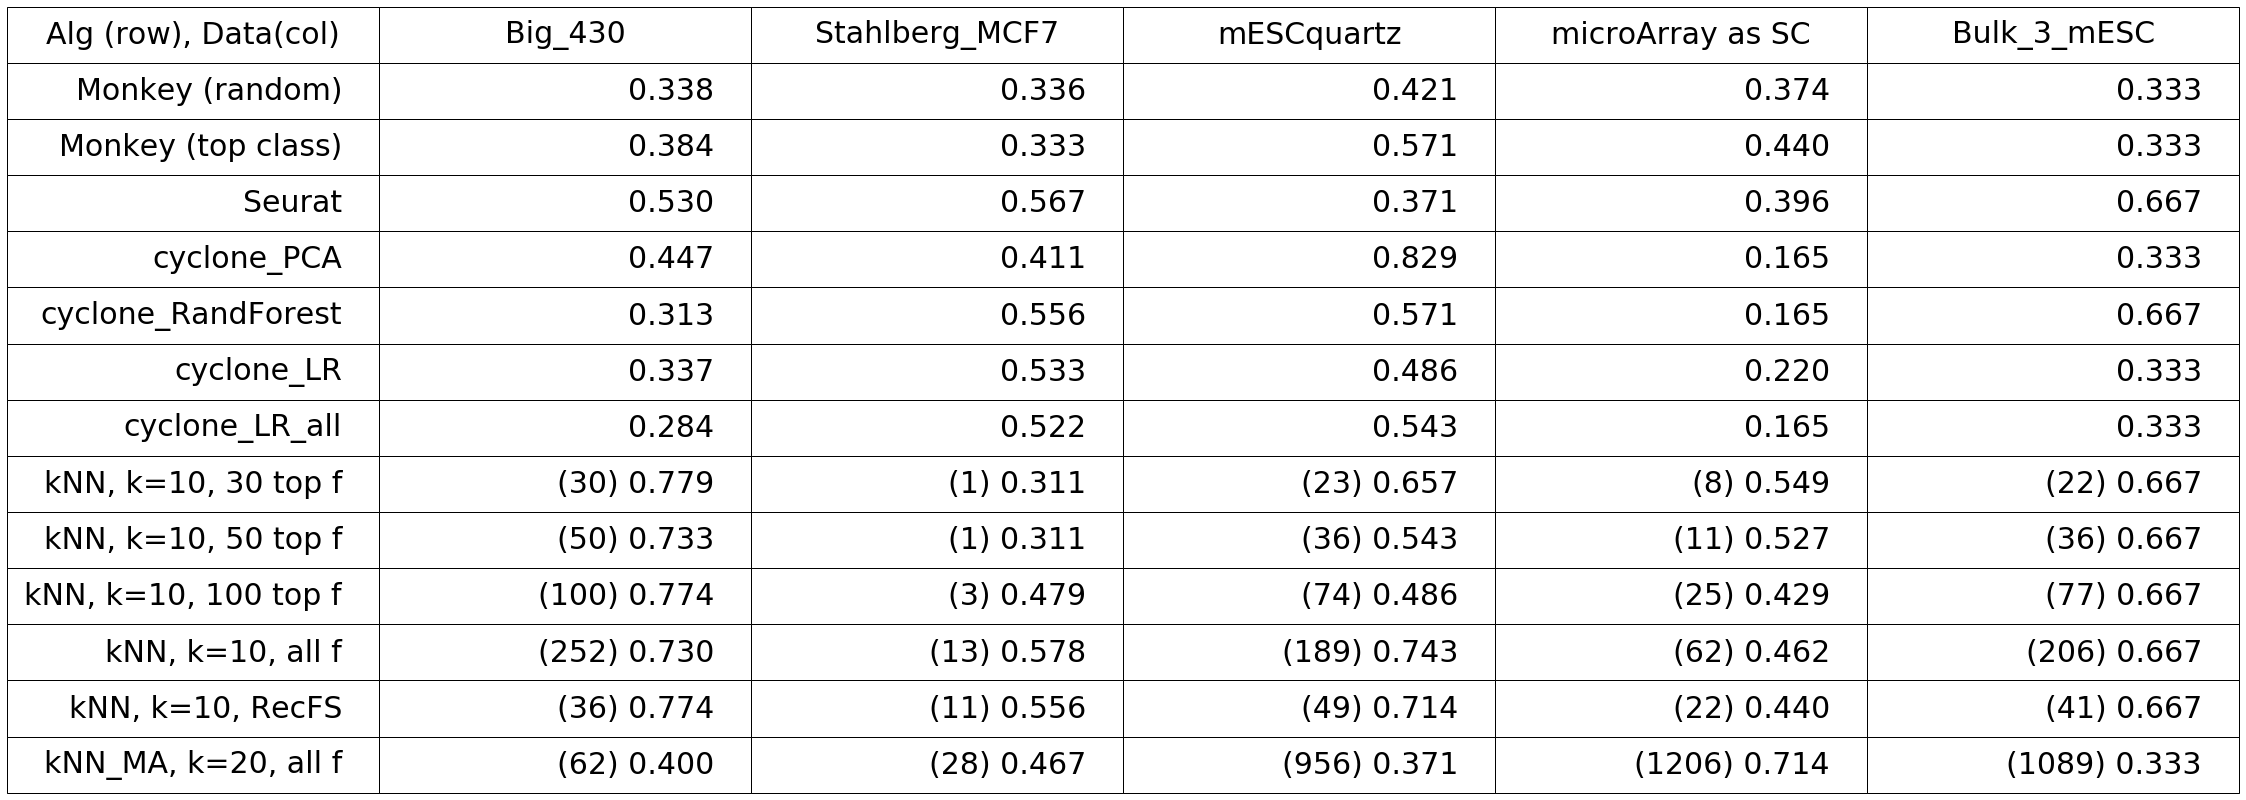

In [215]:
import matplotlib.pyplot as plt
from pylab import *
big_comparison_data = []
# monkey code above, uncomment output to determine top class
big_comparison_data.append(["Monkey (random)", "0.338", "0.336", "0.421", "0.374", "0.333"]) # October notebook
big_comparison_data.append(["Monkey (top class)", "0.384", "0.333", "0.571", "0.440", "0.333"])
# Run R script on my laptop
# /Users/alisa/Downloads/cell_cycle_vignette_files/whitfield_as_sc.R
big_comparison_data.append(["Seurat", "0.530", "0.567", "0.371", "0.396", "0.667"])
# data set for cyclone prepared in this notebook
# in /Users/alisa/cyclone_python2.7/bin/python/cyclone_python2.7/ source bin/activate
# cd /Users/alisa/cyclone_python2.7/cyclone-master/py/core
# inside environment, jupyter notebook &  
# accuracy output on screen 
big_comparison_data.append(["cyclone_PCA", "0.447", "0.411", "0.829", "0.165", "0.333"]) 
big_comparison_data.append(["cyclone_RandForest", "0.313", "0.556", "0.571", "0.165", "0.667"])
big_comparison_data.append(["cyclone_LR", "0.337", "0.533", "0.486", "0.220", "0.333"])
big_comparison_data.append(["cyclone_LR_all", "0.284", "0.522", "0.543", "0.165", "0.333"])
# python3 Evaluate_Selected_Features_On_Test.py > Evaluate_Selected_Features_On_Test.cpp
# output printed;  input the results of computation and analysis from Explore_930_Data_January.ipynb
# new files Generic_Evaluate_Selected_Features_On_Test.py > Generic_Evaluate_Selected_Features_On_Test.cpp
# input files to Generic.. above in this notebook and in Explore_930_Data_January.ipynb
# top f are from the k=3 experiment....
big_comparison_data.append(["kNN, k=10, 30 top f", "(30) 0.779", "(1) 0.311", "(23) 0.657", "(8) 0.549", "(22) 0.667"])
big_comparison_data.append(["kNN, k=10, 50 top f", "(50) 0.733", "(1) 0.311", "(36) 0.543", "(11) 0.527", "(36) 0.667"])
big_comparison_data.append(["kNN, k=10, 100 top f", "(100) 0.774", "(3) 0.479", "(74) 0.486", "(25) 0.429", "(77) 0.667"])
big_comparison_data.append(["kNN, k=10, all f", "(252) 0.730", "(13) 0.578", "(189) 0.743", "(62) 0.462", "(206) 0.667"])
# python3 Generic_Feature_Select_and_Evaluate_On_Test.py > Generic_Get_Train_Intersection_With_Test.cpp > Feature_Selection_Recursive > Generic_Evaluate_Selected_Features_On_Test
big_comparison_data.append(["kNN, k=10, RecFS", "(36) 0.774", "(11) 0.556", "(49) 0.714", "(22) 0.440", "(41) 0.667"])
# now run this for test set being the micro-array leg
big_comparison_data.append(["kNN_MA, k=20, all f", "(62) 0.400", "(28) 0.467", "(956) 0.371", "(1206) 0.714", "(1089) 0.333"])
plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["Alg (row), Data(col)", "Big_430", "Stahlberg_MCF7", "mESCquartz", "microArray as SC", "Bulk_3_mESC"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=big_comparison_data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
plt.show()

In [ ]:
# Time Log

# Wednesday
# 10am - 
# settup up the todos
# 
#


# Tuesday 3hrs
# 9am - 12pm 
# testing: Average error: 0.273936  
# k-fold validation Average accuracy = 72.6%

# Monday - 6hrs
# 9am - 1pm, 2pm - 4pm
# checking code for 3 time-points
# Precise_Evaluate_Selected_Features_On_Test.py -> Precise_Evaluate_Selected_Features_On_Test.cpp
# Now, write a script to do this for all features
# python3 Precise_k-Fold-Evalute_Selected_Features_On_Test.py > Precise_k-Fold-Evaluate_Selected_Features_On_Test.cpp

# Friday 6hrs
# 10am - 6pm
# Plan:
# a: filter out 3 different stage cells from the micro-array
# b: get their angle using an average from k-nn using the rest of micro-array
# c: compare the error in angles
# d: do this as 30 fold cross-validation
# writing code

# Thursday 8 hrs
# 9am - 5pm
# Exploring using micro-array as the train dataset again and seeing what recursive feature selection looks like:
# k = 1, top accuracy 0.088
# k = 3, top accuracy 0.802
# k = 5, top accuracy 0.89
# k = 10, top accuracy 0.08
# made scripts more generic for input files; played around with k for all features using micro-array as test -
# got the best overall accuracies - pretty low - by using k=20;  verified that for k=1, get accuracy of 1 for microarray
# TODO: perhaps try RecFC for micro-array???

# Wednesday 5hrs
# 9am - noon, 6:30pm-8:30pm
# wrote, tested, ran recursive feature selection based on gene intersection (on train set)

# Tuesday 4.5 hrs
# 9:30am - 2pm
# read two chapters from book
# rough future plan:  
# run on different subset top features top 50 and top 100 from training and the test set
# do recursive feature selection on intersection (with training data!!!) and pick best k and best features, apply; check time...
# try recursive feature selection with early stopping
# consider book suggestions for slower but better ideas?: 
# TODO:
# a) discriminant adaptive nearest-neighbor (DANN) rule of Hastie and Tibshirani (1996a). (stretch distance for dimentions that are poor local discriminants)
# b) Global Dimension Reduction for Nearest-Neighbors -  Hastie and Tibshirani (1996a) select dimension with high eigenvalues
# c) A variant of 10-fold validation on the training set - recursively split training into training and validation, remove incorrectly classified cells...?
# d) dig up the cyclone training set - 182 MESC normCountsBuettnerEtAl.h5f
# e) read more in book on kernels? and/or weighing different features differently?

# Monday 7 hrs
# 9am - noon, 1pm - 5pm
# wrote and debugged scripts
# got accuracies for all datasets with intersection with top 30 genes from 500-set feature selection, k=3
# got accuracies for all datasets using intersection with all 252 features

# Friday 6 hrs
# 9am - noon, 1pm - 4pm
# Worked on Bioinformatics Review

# Thursday 5 hrs
# 9:30am - 2:30pm
# properly computed accuracy for all datasets with prior algorithms

# Wednesday 6 hrs
# 9:30am - 3:30pm
# bruce meeting, faculty candidate meeting
# Required online (RCRS) Training - 8 modules with quizes

# Tuesday 8 hrs
# 8:30am - noon, 1pm-5:30pm
# meeting with Steve
# finished feature selection, applied to 430 test set
# got accuracies for all algs for 430 dataset
# group meeting

# Monday 7.5 hrs:
# 8am - 12:30pm, 1pm - 4pm
# finished writing for k = 1, 3, 5, 7, 10, 20, 30, as you move from 1 feature to 252 features, as parallel version;
# plotted
# writing feature selection, debugging;  runtime for full feature selection to 252 genes is 1 hour
# launched jobs for k = 1, 3, 5 (higher k is not doing well)
# wrote evaluation on test set - need to test and check on the final selection of features

# Friday 6.5 hrs:
# 9:30am - 4pm 
# re-writing for k=1 as you move from 1 feature to 252 features, as parallel version; 
# debugging, prallel version takes < 1 min for k=1
# discovered a conceptual bug between old python implementation and current cpp one; debugging

# Thursday 4 hrs:
# 10:30am - 2:30pm
# re-writing isolated features program in c++ as serial version; debugging; takes < 3 min 
# plotted graph

# Wednesday 4 hrs:
# 11:30am - 3:30pm
# realized that iterative feature selection will take ~7 days even with parallel version in python
# considered various suggested python speedup alternatives
# decided that c++ is the right way to go
# re-learning c++

# Tuesday 3.5hrs: 
# 7am - 8:30am, 2pm - 4pm 
# debugged and ran the accuracy of each feature in isolation sorted by accuracy (ALL IN TRAIN)
# plotted graph
# the accuracy of your classifier for k=1 as you move from 1 feature to 250 features:
# wrote and tested serial version - takes ~4min per features, will take 16hrs
# wrote and tested fully parallel version  - takes 40 minutes
# plotted graph